In [1]:
import os
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [2]:
reddit = praw.Reddit(
 client_id=os.environ.get("REDDIT_CLIENT_ID"),
 client_secret=os.environ.get("REDDIT_CLIENT_SECRET"),
 user_agent=os.environ.get("REDDIT_USER_AGENT"),
)

In [3]:
headlines = set()
for submission in reddit.subreddit("hiphopheads").hot(limit=None):
    headlines.add(submission.title)

In [4]:
hhh_df = pd.DataFrame(headlines)
hhh_df.columns = ['Titles']
hhh_df.head()

,Titles
0,[FRESH ALBUM] Wiki and Tony Seltzer - 14K Figaro
1,Yeat - No morë talk
2,[FRESH ALBUM] Koi & Dylvinci - Overdue
3,[Throwback Thursday] I Decline - Envelope
4,[FRESH ALBUM] Tee Grizzley - Tee’s Coney Islan...


In [5]:
hhh_df.Titles.duplicated().sum() # Duplicate count for Tweet
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
 text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
 text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(cleanTxt)
#Show the clean text
hhh_df.head()

,Titles
0,[FRESH ALBUM] Wiki and Tony Seltzer - 14K Figaro
1,Yeat - No morë talk
2,[FRESH ALBUM] Koi & Dylvinci - Overdue
3,[Throwback Thursday] I Decline - Envelope
4,[FRESH ALBUM] Tee Grizzley - Tee’s Coney Islan...


In [6]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(remove_emoji)
#Show the clean text
hhh_df.head()

,Titles
0,[FRESH ALBUM] Wiki and Tony Seltzer - 14K Figaro
1,Yeat - No morë talk
2,[FRESH ALBUM] Koi & Dylvinci - Overdue
3,[Throwback Thursday] I Decline - Envelope
4,[FRESH ALBUM] Tee Grizzley - Tee’s Coney Islan...


In [7]:
#import sys
#sys.path.append('../Community-Sentiment-Album/venv/Lib/site-packages/')
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [8]:
#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
hhh_df['Subjectivity'] = hhh_df['Titles'].apply(getSubjectivity)
hhh_df['Polarity'] = hhh_df['Titles'].apply(getPolarity)
#Now display data
hhh_df.head()

,Titles,Subjectivity,Polarity
0,[FRESH ALBUM] Wiki and Tony Seltzer - 14K Figaro,0.5,0.30
1,Yeat - No morë talk,0.0,0.00
2,[FRESH ALBUM] Koi & Dylvinci - Overdue,0.5,0.30
3,[Throwback Thursday] I Decline - Envelope,0.0,0.00
4,[FRESH ALBUM] Tee Grizzley - Tee’s Coney Islan...,0.7,0.45


In [9]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return "Negative"
 elif score == 0:
     return "Neutral"
 else:
     return "Positive"
hhh_df["Insight"] = hhh_df["Polarity"].apply(getInsight)
hhh_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,[FRESH ALBUM] Wiki and Tony Seltzer - 14K Figaro,0.500000,0.300000,Positive
1,Yeat - No morë talk,0.000000,0.000000,Neutral
2,[FRESH ALBUM] Koi & Dylvinci - Overdue,0.500000,0.300000,Positive
3,[Throwback Thursday] I Decline - Envelope,0.000000,0.000000,Neutral
4,[FRESH ALBUM] Tee Grizzley - Tee’s Coney Islan...,0.700000,0.450000,Positive
5,Spice 1 - Heart Break Hotel,0.000000,0.000000,Neutral
6,Daily Discussion Thread 10/30/2023,0.000000,0.000000,Neutral
7,[FRESH] SLIME DOLLAZ - CHASING STARS (PROD.STE...,0.500000,0.300000,Positive
8,Erick the Architect - We On It produced by Eri...,0.000000,0.000000,Neutral
9,[FRESH ALBUM] FRIENDZONE - COLLECTION 3,0.500000,0.300000,Positive


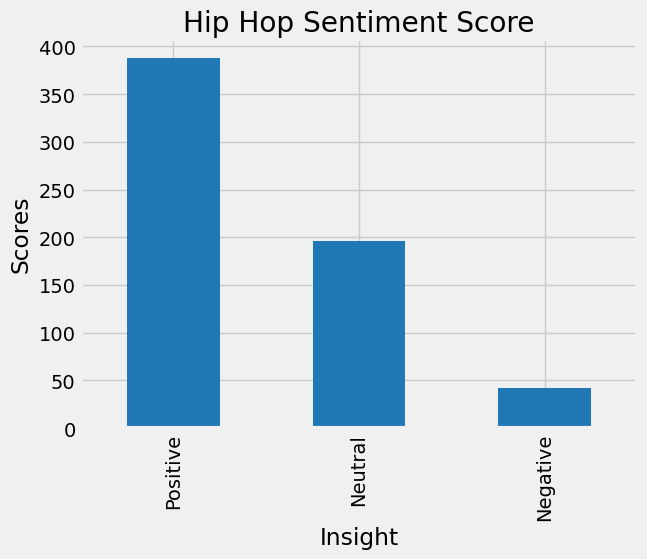

In [10]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Hip Hop Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
hhh_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

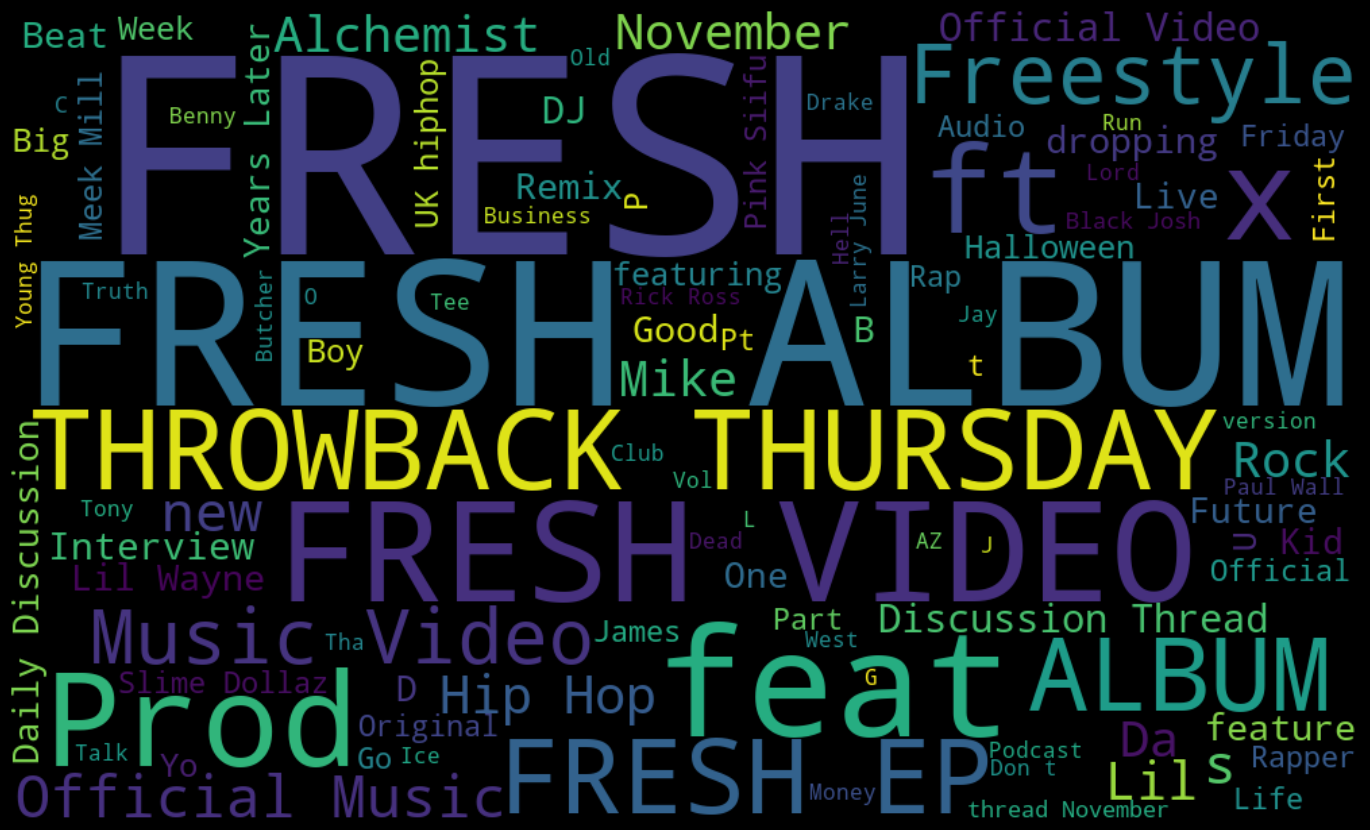

In [11]:
stopwords = STOPWORDS
#print(stopwords)
#Let checkout the stop words in Python

text = ' '.join( [twts for twts in hhh_df['Titles']] ) #To join all tweet
 # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600, 
 max_words = 100,
 stopwords = stopwords,
 background_color="black").generate(text)
# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [12]:
submissions = []
for submission in reddit.subreddit('hiphopheads').hot(limit=25): 			 	submissions.append(submission)
comments = []
for s in submissions:
#     print(s.title)
    submission = reddit.submission(id=s)
    for c in list(submission.comments):
#     	print(c.author, c.body)

SyntaxError: incomplete input (3052954991.py, line 8)

In [ ]:
from collections import defaultdict
submissions = []
for submission in reddit.subreddit('hiphopheads').hot(limit=10): submissions.append(submission)
comments = [] 
user_comment_counts = defaultdict(int)
for s in submissions:
    submission = reddit.submission(id=s)
    for c in list(submission.comments):
        user_comment_counts[c.author] +=1
top_users = []
n = 1
for k,v in user_comment_counts.items():
#    print(v)
    if v>n: # n is the comment threshold
        top_users.append(k)
#         print(k)
for u in top_users:
	for comment in reddit.redditor(u.name).comments.new(limit=None): 			print(comment.body.split('\n', 1)[0][:250])